# Linear regression

Import all the modules you will need in this notebook here:

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [1]:
# exercise 0
# Put your solution here!
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# plots a line given an intercept and a slope
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd

#PASS

In [2]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
filepath = get_path("fram.txt")
fram = pd.read_csv(filepath, sep = '\t')
fram.describe()

#PASS

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [3]:
# exercise 2
# Put your solution here!
def rescale(s):
    mean = s.mean()
    std = s.std()
    normal = (s - mean)/(2 * std)
    
    return normal
#PASS

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [4]:
# exercise 3
fram["sAGE"] = rescale(fram.AGE)
fram["sFRW"] = rescale(fram.FRW)
fram["sSBP"] = rescale(fram.SBP)
fram["sDBP"] = rescale(fram.DBP)
fram["sCHOL"] = rescale(fram.CHOL)
fram["sCIG"] = rescale(fram.CIG)

fram.head()
#PASS

,ID,SEX,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,YRS_CHD,DEATH,YRS_DTH,CAUSE,sAGE,sFRW,sSBP,sDBP,sCHOL,sCIG
0,4988,female,57,135,186,NaN,120,150,0,1,pre,7,11,unknown,0.477764,0.834668,0.676501,1.049625,-0.914016,-0.346569
1,3001,female,60,123,165,NaN,100,167,25,0,16,10,17,unknown,0.791473,0.496687,0.301796,0.346698,-0.730446,0.732493
2,5079,female,54,115,140,NaN,90,213,5,0,8,8,13,unknown,0.164056,0.271367,-0.144281,-0.004765,-0.233727,-0.130757
3,5162,female,52,102,170,NaN,104,280,15,0,10,7,11,unknown,-0.045083,-0.094779,0.391012,0.487283,0.489755,0.300868
4,4672,female,45,99,185,NaN,105,326,20,0,8,10,17,unknown,-0.777070,-0.179274,0.658658,0.522430,0.986475,0.516680


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [5]:
# exercise 4
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL', data = fram).fit()
fit.summary()
#PASS

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           4.13e-40
Time:                        11:39:16   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      0.000     148.088     151.952
SEX[T.male]    -4.0659      1.451     -2.803      0.005      -6.912      -1.220
sFRW           17.7205      1.426     12.431      0.000      14.924      20.517
sCHOL           4.9169      1.431      3.436      0.001       2.110       7.724
==============================================================================
Omnibus:                      327.612   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.676
Skew:                           1.237   Prob(JB):                    6.28e-184
Kurtosis:                       5.899   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [6]:
# exercise 5
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE', data = fram).fit()
fit.summary()
#PASS

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           2.44e-46
Time:                        11:39:16   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      0.000     148.259     152.080
SEX[T.male]    -4.3805      1.435     -3.053      0.002      -7.195      -1.566
sFRW           16.9771      1.415     11.999      0.000      14.202      19.753
sCHOL           4.2696      1.419      3.009      0.003       1.486       7.053
sAGE            8.1332      1.400      5.810      0.000       5.387      10.879
==============================================================================
Omnibus:                      321.087   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.955
Skew:                           1.206   Prob(JB):                    2.45e-183
Kurtosis:                       5.944   Cond. No.                         2.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

Your solution here

***

Try to add to the model all the interactions with other variables. 

In [7]:
# exercise 6
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sAGE + sAGE:sFRW + sCHOL:SEX + sAGE:SEX + sAGE:sCHOL ', data = fram).fit()
fit.summary()
#PASS

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           4.92e-43
Time:                        11:39:16   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.001    150.355      0.000     148.580     152.508
SEX[T.male]          -4.7309      1.451     -3.261      0.001      -7.577      -1.885
sFRW                 16.6450      1.723      9.660      0.000      13.265      20.025
sFRW:SEX[T.male]      1.6673      3.088      0.540      0.589      -4.390       7.725
sCHOL                 3.6181      1.878      1.926      0.054      -0.066       7.302
sCHOL:SEX[T.male]     1.0231      2.933      0.349      0.727      -4.730       6.776
sCHOL:sFRW            4.9729      2.718      1.829      0.068      -0.359      10.305
sAGE                 10.2189      2.003      5.101      0.000       6.289      14.149
sAGE:SEX[T.male]     -4.2923      2.886     -1.488      0.137      -9.953       1.368
sAGE:sFRW            -2.0866      2.803     -0.744      0.457      -7.585       3.412
sAGE:sCHOL           -4.7564      3.044     -1.563      0.118     -10.728       1.215
==============================================================================
Omnibus:                      313.112   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.290
Skew:                           1.185   Prob(JB):                    6.10e-175
Kurtosis:                       5.863   Cond. No.                         6.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

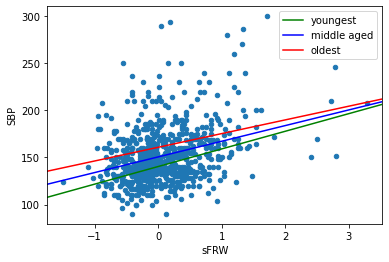

In [8]:
# exercise 7
# Put your solution here!
fram[fram.SEX=="female"].plot.scatter("sFRW", "SBP")
p = fit.params

abline_plot(intercept=p.Intercept - p["sAGE"], slope=p.sFRW - p["sAGE:sFRW"],ax=plt.gca(), color="green", label="youngest")
abline_plot(intercept=p.Intercept, slope=p.sFRW,ax=plt.gca(), color="blue", label="middle aged")
abline_plot(intercept=p.Intercept + p["sAGE"], slope=p.sFRW + p["sAGE:sFRW"],ax=plt.gca(), color="red", label="oldest")

plt.legend()
plt.show()
#PASS


How does the dependence of blood pressure on weight change as a person gets older?
***

Your solution here.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

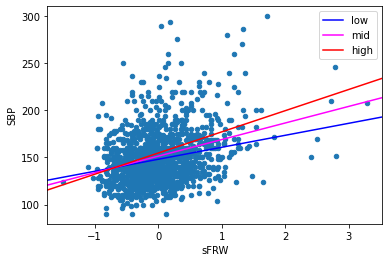

In [9]:
# exercise 8
fit = smf.ols('SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sAGE + sAGE:sFRW + sCIG + sFRW:sCIG + sCHOL:SEX + sAGE:SEX + sAGE:sCHOL + sCIG:SEX + sCIG:sAGE + sCIG:sCHOL', data = fram).fit()
fit.summary()

p=fit.params
fram.plot.scatter("sFRW", "SBP")
abline_plot(intercept=p.Intercept - p["sCHOL"], slope=p.sFRW - p["sCHOL:sFRW"], ax=plt.gca(), color="blue", label="low")
abline_plot(intercept=p.Intercept, slope=p.sFRW, ax=plt.gca(), color="magenta", label="mid")
abline_plot(intercept=p.Intercept + p["sCHOL"], slope=p.sFRW + p["sCHOL:sFRW"], ax=plt.gca(), color="red", label="high")
plt.legend();

#PASS

How does the model and its accuracy look?

***

Your solution here.

***

# Logistic regression

In [10]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [11]:
# exercise 9
# Put your solution here!
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram,family=sm.families.Binomial()).fit()
error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate_orig)

#PASS

0.35581061692969873


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [12]:
# exercise 10
# Put your solution here!
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data=fram,family=sm.families.Binomial()).fit()
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate)

#PASS

0.3278335724533716


Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

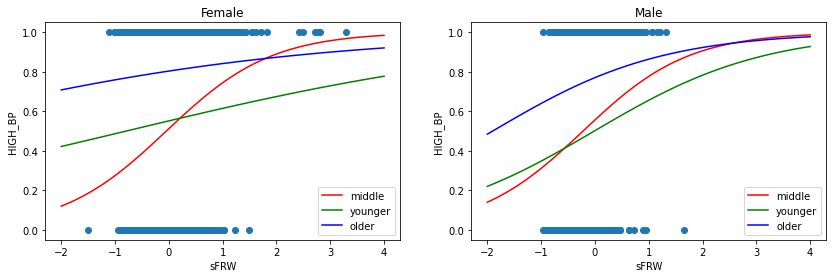

In [13]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!

## FEMALE PLOT
fig, ax = plt.subplots(1, 2, subplot_kw={"xlabel": "sFRW", "ylabel": "HIGH_BP"}, figsize=(14, 4))

X=np.linspace(-2, 4, 100)
p = fit.params

ax[0].scatter(fram.sFRW[(fram.SEX=='female')],fram.HIGH_BP[(fram.SEX=='female')])
ax[0].plot(X, logistic(X*p.sFRW + p["sAGE:sFRW"] + p.Intercept), color="red", label="middle")
ax[0].plot(X, logistic(X*(p.sFRW + p["sAGE:sFRW"]) + p.Intercept - p["sAGE"]), color="green", label="younger")
ax[0].plot(X, logistic(X*(p.sFRW + p["sAGE:sFRW"]) + p.Intercept + p["sAGE"]), color="blue", label="older")
ax[0].set_title("Female")
ax[0].legend()

ax[1].scatter(fram.sFRW[(fram.SEX=='male')],fram.HIGH_BP[(fram.SEX=='male')])
ax[1].plot(X, logistic(X*p.sFRW + p["sAGE:sFRW"] + p["SEX[T.male]:sFRW"] + p["SEX[T.male]"] + p.Intercept), color="red", label="middle")
ax[1].plot(X, logistic(X*(p.sFRW + p["sAGE:sFRW"] + p["SEX[T.male]:sFRW"]) + p.Intercept - p["sAGE"] + p["SEX[T.male]"]), color="green", label="younger")
ax[1].plot(X, logistic(X*(p.sFRW + p["sAGE:sFRW"] + p["SEX[T.male]:sFRW"]) + p.Intercept + p["sAGE"]+ p["SEX[T.male]"]), color="blue", label="older")
ax[1].set_title("Male")
ax[1].legend()

plt.show()

# PASS

How do the models with different ages and genders differ from each other?

***
Your solution here.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [14]:
# exercise 12
# Put your solution here!
# def train_test_split(df, train_fraction):
#     df_train, df_test = np.split(df, [int(train_fraction*len(df))])
#     return df_train, df_test

def train_test_split(df, train_fraction):
    df_train= df.sample(frac = train_fraction)
    df_test = df.drop(df_train.index)
    return df_train, df_test

# PASS

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [15]:
# exercise 13
# np.random.seed(10)
# Put your solution here!
# test, train = train_test_split(fram, 0.2)

# fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=train,
#     family=sm.families.Binomial(statsmodels.genmod.families.links.logit)).fit()
# print(fit.summary())

# pred = fit.predict(test, transform=True)
# error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) | ((pred > 0.5) & (test.HIGH_BP==0)))
# print(error_rate, 1 - test.HIGH_BP.mean())

error_model=[]
error_null=[]
np.random.seed(1)

for i in range(100):
    train, test = train_test_split(fram, 0.8)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sAGE:sFRW + sAGE:SEX", data=train,
    family=sm.families.Binomial()).fit()
#     print(fit.summary())

    pred = fit.predict(test)
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) | ((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())

pd.Series(error_model).mean()
# pd.Series(error_null).mean()

# PASS

0.3311827956989247

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [35]:
# exercise 14
# Put your solution here!
fram["hasCHD"] = fram.CHD > 0
fram["hasCHD"] = fram["hasCHD"].astype(int)

fram.hasCHD.mean()

# PASS

0.22022955523672882

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [45]:
#  exercise 15
# Put your solution here!
train, test = train_test_split(fram, 0.8)

fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW", data=train,
    family=sm.families.Binomial()).fit()
print(fit.summary())

pred = fit.predict(test, transform=True)
error_rate = np.mean(((pred < 0.5) & (test.hasCHD==1)) | ((pred > 0.5) & (test.hasCHD==0)))
print(error_rate)

# error_model=[]
# error_null=[]
# np.random.seed(1)

# for i in range(100):
#     train, test = train_test_split(fram, 0.8)
#     fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW", data=train,
#     family=sm.families.Binomial()).fit()
#     print(fit.summary())

#     pred = fit.predict(test)
#     error_rate = np.mean(((pred < 0.5) & (test.hasCHD==1)) | ((pred > 0.5) & (test.hasCHD==0)))
#     error_model.append(error_rate)
#     error_null.append((1 - test.hasCHD).mean())

# pd.Series(error_model).mean()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1115
Model:                            GLM   Df Residuals:                     1108
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -578.11
Date:                Mon, 23 Aug 2021   Deviance:                       1156.2
Time:                        12:34:09   Pearson chi2:                 1.11e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2873      0.075    -17.089      0.0

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

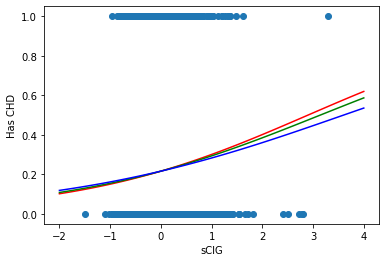

In [46]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!
# fram.plot.scatter("hasCHD", "sFRW")

X=np.linspace(-2, 4, 100)
p = fit.params

plt.scatter(fram.sFRW,fram.hasCHD)
plt.plot(X, logistic(X*p.sCIG + p.Intercept), color="red")
plt.plot(X, logistic(X*p.sFRW + p.Intercept), color="green")
plt.plot(X, logistic(X*p.sCHOL + p.Intercept), color="blue")


plt.xlabel("sCIG")
plt.ylabel("Has CHD")
# plt.legend()
plt.show()

#scatter plot

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
Your solution here.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [49]:
# exercise 17
# Put your solution here!

nCHOL = (200 - test.CHOL.mean())/(2 * test.CHOL.std())
nCIG = (200 - test.CIG.mean())/(2 * test.CIG.std())
nFRW = (200 - test.FRW.mean())/(2 * test.FRW.std())

point = {'CHOL': 200, 'CIG':17, 'FRW':100 ,'sCHOL':nCHOL, 'sCIG':nCIG, 'sFRW':nFRW}

print(point)

predicted = fit.predict(point)
print(predicted)
# variable "point"

{'CHOL': 200, 'CIG': 17, 'FRW': 100, 'sCHOL': -0.370158598588822, 'sCIG': 8.098841756318821, 'sFRW': 2.75801859127424}
0    0.999887
dtype: float64
